In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [2]:
train_data=pd.read_csv('train.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape

(42000, 785)

In [5]:
test_data=pd.read_csv('test.csv')

In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data.shape

(28000, 784)

In [8]:
train_data.shape

(42000, 785)

In [27]:
def showimage(row_num):
    a=train_data.iloc[row_num,1:].values
    a=a.reshape(28,28).astype('uint8')
    plt.imshow(a)
    plt.pause(0.1)
    plt.show()

<IPython.core.display.Javascript object>


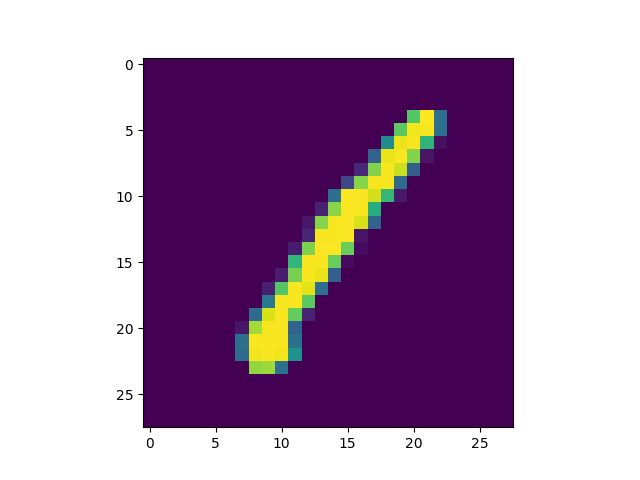

/anaconda/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


NotImplementedError: 

In [29]:
for i in range (50):
showimage(i)


<IPython.core.display.Javascript object>


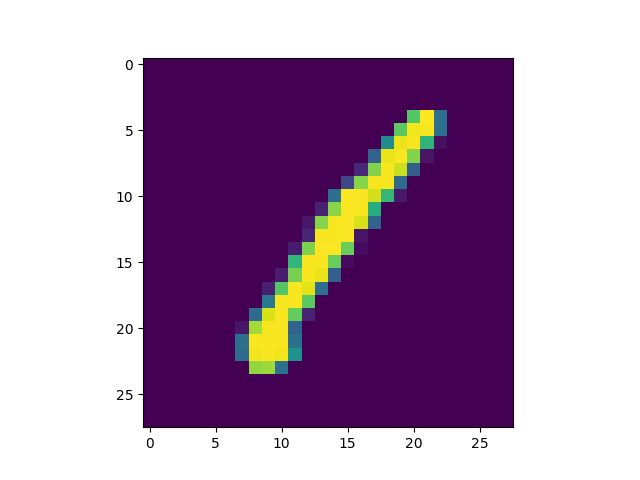

0


/anaconda/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


NotImplementedError: 

In [43]:
plt.figure()
for i in range(100):
    a=train_data.iloc[i,1:].values
    a=a.reshape(28,28).astype('uint8')
    print(i)
    plt.imshow(a)
    plt.pause(0.5)
    print(i,i)
#plt.draw()

In [41]:
from sklearn.cross_validation import train_test_split

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
X_train,X_test,y_train,y_test=train_test_split(train_data.iloc[:,1:],train_data.iloc[:,0],random_state=7)

In [16]:
rfc=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [17]:
y_predict=rfc.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [19]:
accuracy_score(y_test,y_predict)

0.96409523809523812

## Lets do gridsearch to find best number of trees in random forrest model

In [18]:
from sklearn.grid_search import GridSearchCV

D:\anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [19]:
param_grid={'n_estimators':[10,100,500,1000] }

In [20]:
grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=10,scoring='accuracy')

In [21]:
grid.fit(X_train,y_train)

KeyboardInterrupt: 

In [40]:
grid.grid_scores_

[mean: 0.93454, std: 0.00307, params: {'n_estimators': 10},
 mean: 0.96235, std: 0.00242, params: {'n_estimators': 100},
 mean: 0.96413, std: 0.00223, params: {'n_estimators': 500},
 mean: 0.96470, std: 0.00240, params: {'n_estimators': 1000}]

In [41]:
rfc=RandomForestClassifier(n_estimators=1000).fit(X_train,y_train)

In [42]:
y_predict=rfc.predict(X_test)
accuracy_score(y_test,y_predict)

0.96733333333333338

## Lets use Gradient Boosting Classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
gbc=GradientBoostingClassifier().fit(X_train,y_train)
# seems to not convering!!! Bad choice

KeyboardInterrupt: 

In [40]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Lets use neural networks

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
param_grid={'activation':[10,100,500,1000] }

In [35]:
# Lets start with default settings. To use is as benchmark
nn=MLPClassifier().fit(X_train,y_train)

In [36]:
y_predict_nn=nn.predict(X_test)

In [37]:
print('Accuracy of MLPClassifier with default settings is:')
print(accuracy_score(y_test,y_predict_nn))

Accuracy of MLPClassifier with default settings is:
0.943238095238


In [38]:
nn

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [39]:
nn3=MLPClassifier(hidden_layer_sizes=(1000, 500, 300,200,100)).fit(X_train,y_train)

In [40]:
y_predict_nn3=nn3.predict(X_test)
print('Accuracy of MLPClassifier with 3 layer[1000, 500, 300,200,100] settings is:')
print(accuracy_score(y_test,y_predict_nn3))

Accuracy of MLPClassifier with 3 layer[1000, 500, 300,200,100] settings is:
0.969238095238


In [31]:
nn3.max_iter

1200

In [41]:
nn4=MLPClassifier(hidden_layer_sizes=(1000, 500, 300,200,100), max_iter=1200).fit(X_train,y_train)

In [43]:
y_predict_nn4=nn4.predict(X_test)
print('Accuracy of MLPClassifier with 3 layer[200,100,500] settings is:')
print(accuracy_score(y_test,y_predict_nn4))

Accuracy of MLPClassifier with 3 layer[200,100,500] settings is:
0.965714285714


In [67]:
nn4.hidden_layer_sizes

10

In [65]:
# Lets just try to use 10 neurons
nn4=MLPClassifier(hidden_layer_sizes=[10],max_iter=1000,activation='relu').fit(X_train,y_train)

In [68]:
y_predict_nn4=nn4.predict(X_test)
print('Accuracy of MLPClassifier with 1 layer, 10 neurons  settings is:')
print(accuracy_score(y_test,y_predict_nn4))

Accuracy of MLPClassifier with 1 layer, 10 neurons  settings is:
0.870095238095


## This block will be used to train neural networks

In [44]:
layers=[784,374,187,93,46,28,14]
nn5=MLPClassifier(hidden_layer_sizes=layers).fit(X_train,y_train)

In [46]:
y_predict_nn5=nn5.predict(X_test)
print('Accuracy of MLPClassifier with[784,374,187,93,46,28,14] layer settings is:')
print(accuracy_score(y_test,y_predict_nn5))

Accuracy of MLPClassifier with[784,374,187,93,46,28,14] layer settings is:
0.967904761905


In [55]:
layers=[784]
nn6=MLPClassifier(hidden_layer_sizes=layers).fit(X_train,y_train)

In [57]:
y_predict_nn6=nn6.predict(X_test)
print('Accuracy of MLPClassifier with[784] layer settings is:')
print(accuracy_score(y_test,y_predict_nn6))

Accuracy of MLPClassifier with[784] layer settings is:
0.960952380952


In [53]:
nn6.hidden_layer_sizes

[784]

In [52]:
layers=[784,374,187,93,46,28,14] 
layers[:7]

[784, 374, 187, 93, 46, 28, 14]

In [54]:
layers=[784,374,187,93,46,28,14] # number of points is 784 pixels
accuracy=[]
for i in range(len(layers)):
    layer=layers[:(i+1)]
    nn=MLPClassifier(hidden_layer_sizes=layer).fit(X_train,y_train)
    y_predict=nn.predict(X_test)
    print('Accuracy of MLPClassifier with '+str(nn.hidden_layer_sizes) +' layer settings is:')
    print(accuracy_score(y_test,y_predict))
    accuracy.append(y_predict)
    

Accuracy of MLPClassifier with [784] layer settings is:
0.957428571429
Accuracy of MLPClassifier with [784, 374] layer settings is:
0.960380952381
Accuracy of MLPClassifier with [784, 374, 187] layer settings is:
0.956285714286
Accuracy of MLPClassifier with [784, 374, 187, 93] layer settings is:
0.962761904762
Accuracy of MLPClassifier with [784, 374, 187, 93, 46] layer settings is:
0.96219047619
Accuracy of MLPClassifier with [784, 374, 187, 93, 46, 28] layer settings is:
0.963714285714
Accuracy of MLPClassifier with [784, 374, 187, 93, 46, 28, 14] layer settings is:
0.958857142857
